In [1]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang.thread import Thread
from bigbang.thread import Node
import matplotlib.pyplot as plt
import datetime

First, collect data from a public email archive.

In [2]:
url = "https://lists.wikimedia.org/pipermail/analytics/"
arx = Archive(url,archive_dir="../archives")

We can count the number of threads in the archive easily. The first time you run `Archive.get_thread` it may take some time to compute, but the result is cached in the Archive object.

In [3]:
#threads = arx.get_threads()
len(arx.get_threads())

628

We can plot a histogram of the number of messages in each thread. In most cases this will be a power law distribution.

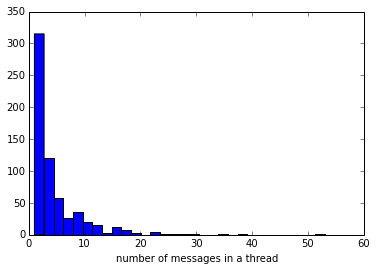

In [4]:
y = [t.get_num_messages() for t in arx.get_threads()]

plt.hist(y, bins=30)
plt.xlabel('number of messages in a thread')
plt.show()

We can also plot the number of people participating in each thread. Here, the participants are differentiated by the *From:* header on the emails they've sent. 

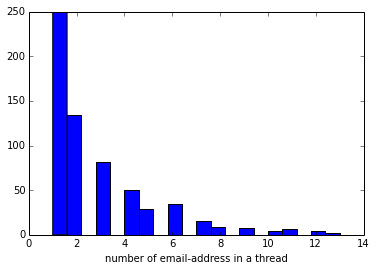

In [5]:
n = [t.get_num_people() for t in arx.get_threads()]

plt.hist(n, bins = 20)
plt.xlabel('number of email-address in a thread')
plt.show()

The *duration* of a thread is the amount of elapsed time between its first and last message. 

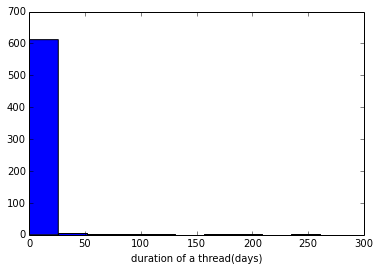

In [6]:
y = [t.get_duration().days for t in arx.get_threads()]

plt.hist(y, bins = (10))
plt.xlabel('duration of a thread(days)')
plt.show()

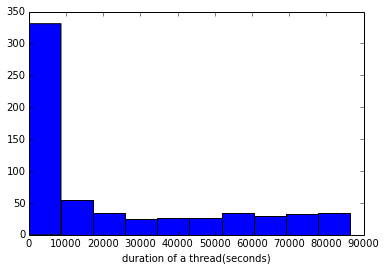

In [7]:
y = [t.get_duration().seconds for t in arx.get_threads()]

plt.hist(y, bins = (10))
plt.xlabel('duration of a thread(seconds)')
plt.show()

You can examine the properties of a single thread.

In [8]:
print((arx.get_threads()[0].get_duration()))

19:49:47


In [9]:
content = arx.get_threads()[0].get_root().data['Body']
content

'Welcome to the the inaugural Analytics Mailing list email.\n\nHere all your analytics wishes comes true, \n\n\nso proposals, ideas, crazy ideas, crazy crazy ideas are welcome here!\nas long as we can count something it is welcome. \n\n\nD\n\n'

In [10]:
len(content.split())

38

Suppose we want to know whether or not longer threads (that contain more distinct messages) have fewer words in them per message.

In [11]:
short_threads = []
long_threads = []
for t in arx.get_threads():
    if(t.get_num_messages() < 6): short_threads.append(t)
    else: long_threads.append(t)

In [12]:
print((len(short_threads)))
print((len(long_threads)))

471
157


You can get the content of a thread like this:

In [13]:
long_threads[0].get_content()

["(Moving this to analytics list, cause uhhh, why not?)\nOk some more info!\nI was testing some of my changes to udp-filter on my test labs instance, and hey!  whadyaknow!  The test failed.  One of the failures was due to the content type field not matching correctly.  It looked like this:\n  text/html; charset=UTF-8\nAnd actually, my test didn't catch the charset portion of this, my regexp is matching via whitespace.  It was the semi-colon in the text/html string that caused the test to fail.\nI started sleuthing, and determined that this only shows up in my logs if I am hitting mediawiki pages.  I grepped mediawiki core, and found that there are tons of places that are manually setting the Content-Type header with the charset. \nSo I'm pretty sure the setting of the value of this header is coming directly from Mediawiki.  But, that isn't really our issue.  Headers are allowed to have spaces in the values.\nHere's some example log output with spaces in headers.\n  https://gist.github.

How would you test to see if longer threads contain less words per message than shorter ones?